In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout

In [2]:
test_df = pd.read_csv("/Users/dinamaizlis/Desktop/dl/sign_mnist_test.csv")

In [3]:
#get the data of the first 2 col that reprijent 5 and 6
test=test_df[:2:]

In [4]:
y_test= test.pop('label').values
x_test = test.values

In [5]:
test  = np.array(x_test)
test  = test.reshape(x_test.shape[0],28,28,1)

In [6]:
## VNJAV

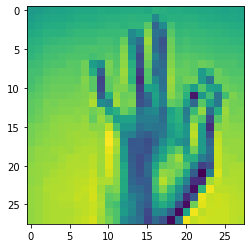

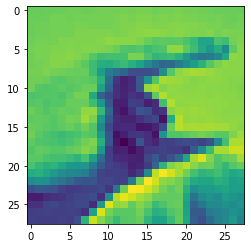

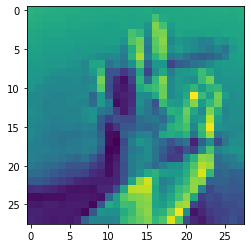

In [7]:
plt.imshow(np.reshape(test[1],(28,28)))
plt.show()
plt.imshow(np.reshape(test[0],(28,28)))
plt.show()
plt.imshow(np.reshape(test[0]-test[1],(28,28)))
plt.show()

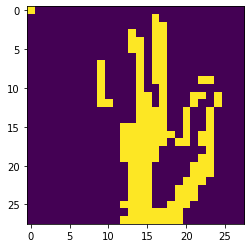

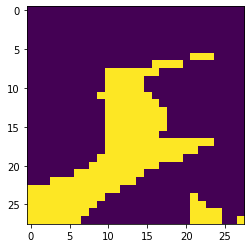

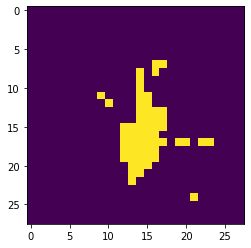

In [8]:
img1=test[1]<test[1].mean()-20
plt.imshow(np.reshape(img1,(28,28)))
plt.show()

img2=test[0]<test[0].mean()-20
plt.imshow(np.reshape(img2,(28,28)))
plt.show()

img1=img1.astype(np.float32)
img2=img2.astype(np.float32)

img3=(img1+img2)>=2
plt.imshow(np.reshape(img3,(28,28)))
plt.show()

In [9]:
# get the spicel index

In [10]:
img3=img3.astype(np.float32)
ii = np.where(img3 == 1)[0]
spicel_index=np.random.choice(ii,4)
spicel_index

array([20,  8, 19, 15])

In [11]:
#the new data

In [12]:
test_df = pd.read_csv("/Users/dinamaizlis/Desktop/dl/sign_mnist_test.csv")
train_df = pd.read_csv("/Users/dinamaizlis/Desktop/dl/sign_mnist_train.csv")

In [13]:
test_df=test_df.loc[test_df['label'].isin([5,6])]
train_df=train_df.loc[train_df['label'].isin([5,6])]

In [14]:
print(f"{train_df.shape = }")
print(f"{test_df.shape = }")

train_df.shape = (2294, 785)
test_df.shape = (595, 785)


In [43]:
plt.figure(figsize = (10,5))
sns.set_style("darkgrid")
sns.countplot(train_df['label'])
plt.show()

KeyError: 'label'

<Figure size 720x360 with 0 Axes>

In [16]:
train_df_spcific_pixel=train_df.iloc[:, [0,406, 489, 495, 408]]
test_df_spcific_pixel=test_df.iloc[:, [0,406, 489, 495, 408]]

In [17]:

y_train_spcific_pixel= train_df_spcific_pixel.pop('label').values
x_train_spcific_pixel = train_df_spcific_pixel.values
y_test_spcific_pixel= test_df_spcific_pixel.pop('label').values
x_test_spcific_pixel = test_df_spcific_pixel.values



y_train= train_df.pop('label').values
x_train = train_df.values
y_test= test_df.pop('label').values
x_test = test_df.values

## KNN model

In [18]:
#all picel
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} knn score: {} ".format(3,knn.score(x_test,y_test)))

 3 knn score: 0.9831932773109243 


In [19]:
#spcific
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train_spcific_pixel,y_train_spcific_pixel)
prediction = knn.predict(x_test_spcific_pixel)
print(" {} knn score: {} ".format(3,knn.score(x_test_spcific_pixel,y_test_spcific_pixel)))

 3 knn score: 0.6638655462184874 


## RANDOM_FOREST model

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(x_train,y_train)
print("random forest algo result: ",rf.score(x_test,y_test))

random forest algo result:  0.9966386554621849


In [32]:
rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(x_train_spcific_pixel,y_train_spcific_pixel)
print("random forest algo result: ",rf.score(x_test_spcific_pixel,y_test_spcific_pixel))

random forest algo result:  0.7159663865546219


## LinearRegression model

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
score = regressor.score(x_test, y_test)
print(score)

-5.103675256732379


In [30]:
regressor = LinearRegression()
regressor.fit(x_train_spcific_pixel, y_train_spcific_pixel)
y_pred = regressor.predict(x_test_spcific_pixel)
score = regressor.score(x_test_spcific_pixel, y_test_spcific_pixel)
print(score)

0.026969079432822785
